In [4]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt

In [5]:
f1 = pd.read_csv('/home/ro/PycharmProjects/Books words counts/David Copperfield.csv', sep='\t')


In [6]:
f1 = f1.rename(index=str, columns={'0': 'words', '1': 'D.Copperfield'})
len(f1)

14057

In [7]:
f1.columns

Index(['words', 'D.Copperfield'], dtype='object')

In [8]:
f1.shape

(14057, 2)

In [9]:
f2 = pd.read_csv('/home/ro/PycharmProjects/Books words counts/The Quantum Universe.csv', sep='\t')

In [10]:
f2 = f2.rename(index=str, columns={'0': 'words', '1': 'Q.Universe'})
len(f2)

7589

In [11]:
f2.columns

Index(['words', 'Q.Universe'], dtype='object')

In [12]:
f3 = pd.read_csv('/home/ro/PycharmProjects/Books words counts/A Unified Physics.csv', sep='\t')

In [13]:
f3 = f3.rename(index=str, columns={'0': 'words', '1': 'U.Physics'})
len(f3)

7274

In [14]:
f3.columns

Index(['words', 'U.Physics'], dtype='object')

In [15]:
f4 = pd.read_csv('/home/ro/PycharmProjects/Books words counts/Scientific American Brave New Brain.csv', sep='\t')

In [16]:
f4 = f4.rename(index=str, columns={'0': 'words', '1': 'A.Brain'})
len(f4)

6898

In [17]:
f4.columns

Index(['words', 'A.Brain'], dtype='object')

In [18]:
f5 = pd.read_csv('/home/ro/PycharmProjects/Books words counts/The Pathway Of Youth.csv', sep='\t')

In [19]:
f5 = f5.rename(index=str, columns={'0': 'words', '1': 'Youth'})
len(f5)

8098

In [20]:
f5.columns

Index(['words', 'Youth'], dtype='object')

In [21]:
# dfs = [df0, df1, df2, dfN]
# df_final = reduce(lambda left,right: pd.merge(left,right,on='name'), dfs)

In [22]:
m1 = pd.merge(f1, f2, on = 'words', how = 'outer')

In [23]:
m1.head()

,words,D.Copperfield,Q.Universe
0,said,2948.0,9.0
1,little,1063.0,15.0
2,would,984.0,102.0
3,one,884.0,99.0
4,could,856.0,87.0


In [24]:
m2 = pd.merge(m1, f3, on = 'words', how = 'outer')
m2.shape

(20993, 4)

In [25]:
m2.head()

,words,D.Copperfield,Q.Universe,U.Physics
0,said,2948.0,9.0,9.0
1,little,1063.0,15.0,14.0
2,would,984.0,102.0,74.0
3,one,884.0,99.0,128.0
4,could,856.0,87.0,81.0


In [26]:
m3 = pd.merge(m2, f4, on = 'words', how = 'outer')

In [27]:
m3.shape

(23382, 5)

In [28]:
m3.head()

,words,D.Copperfield,Q.Universe,U.Physics,A.Brain
0,said,2948.0,9.0,9.0,17.0
1,little,1063.0,15.0,14.0,12.0
2,would,984.0,102.0,74.0,49.0
3,one,884.0,99.0,128.0,112.0
4,could,856.0,87.0,81.0,127.0


In [29]:
m4 = pd.merge(m3, f5, on = 'words', how = 'outer')

In [30]:
m4.shape

(25681, 6)

In [31]:
m4.head()

,words,D.Copperfield,Q.Universe,U.Physics,A.Brain,Youth
0,said,2948.0,9.0,9.0,17.0,9.0
1,little,1063.0,15.0,14.0,12.0,14.0
2,would,984.0,102.0,74.0,49.0,117.0
3,one,884.0,99.0,128.0,112.0,142.0
4,could,856.0,87.0,81.0,127.0,110.0


In [87]:
m4.fillna(0, inplace=True)

In [88]:
m4['Total'] = m4['D.Copperfield'] + m4['Q.Universe'] + m4['U.Physics'] + m4['A.Brain'] + m4['Youth']

In [89]:
m4.head()

,words,D.Copperfield,Q.Universe,U.Physics,A.Brain,Youth,Total
0,said,2948.0,9.0,9.0,17.0,9.0,2992.0
1,little,1063.0,15.0,14.0,12.0,14.0,1118.0
2,would,984.0,102.0,74.0,49.0,117.0,1326.0
3,one,884.0,99.0,128.0,112.0,142.0,1365.0
4,could,856.0,87.0,81.0,127.0,110.0,1261.0


In [90]:
sort_book_words = m4.sort_values(by=['Total', 'words'], ascending=False)

In [91]:
sort_book_words.head()

,words,D.Copperfield,Q.Universe,U.Physics,A.Brain,Youth,Total
0,said,2948.0,9.0,9.0,17.0,9.0,2992.0
3,one,884.0,99.0,128.0,112.0,142.0,1365.0
2,would,984.0,102.0,74.0,49.0,117.0,1326.0
3088,brain,6.0,67.0,18.0,1148.0,34.0,1273.0
4,could,856.0,87.0,81.0,127.0,110.0,1261.0


In [92]:
sort_book_words.to_csv('5 knygu zodziai.csv', sep='\t', encoding='utf-8')

In [93]:
final = pd.concat([sort_book_words['words'], sort_book_words['Total']], axis=1, keys=['Words', 'Total'])

In [94]:
final.set_index(final['Words'])
final.tail()

,Words,Total
12978,aback,1.0
8753,aably,1.0
11727,aability,1.0
19402,aaas,1.0
9310,0,1.0


In [95]:
final.shape

(25681, 2)

In [96]:
dropNfinal = final.dropna()
dropNfinal.shape

(25681, 2)

In [135]:
dropNfinal[70:100]

,Words,Total
183,years,386.0
46,mother,385.0
70,without,379.0
52,night,376.0
57,took,375.0
55,eyes,373.0
51,returned,369.0
63,put,365.0
88,better,365.0
60,rst,364.0


In [142]:
tot_sum = dropNfinal['Total'].sum()
tot_sum

253685.0

In [192]:
knew_count = dropNfinal['Total'].iloc[:1000].sum()
knew_count

139201.0

In [193]:
percent = (knew_count / tot_sum) * 100
percent

54.871592723259155

([<matplotlib.patches.Wedge at 0x7f0d5ef9e7f0>,
 [Text(0.07622445141372314, 0.494155676894111, 'Suzinosim'),
  Text(-0.060979561130978466, -0.3953245415152888, 'Zinom')],
 [Text(0.045734670848233884, 0.2964934061364666, '45%'),
  Text(-0.030489780565489233, -0.1976622707576444, '55%')])

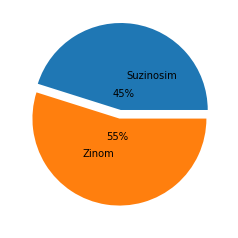

In [205]:
per = [(100 - percent), percent]
plt.pie(per, labels=["Suzinosim", 'Zinom'], autopct='%1.0f%%', pctdistance=0.2, labeldistance=0.4, explode = (0.1, 0))